In [7]:
# Topic 9: Sorting Algorithms 
# Task 1: Implementing and Analyzing Sorting Algorithms 

Bubble Sort: [11, 12, 22, 25, 64]
Selection Sort: [11, 12, 22, 25, 64]
Insertion Sort: [11, 12, 22, 25, 64]


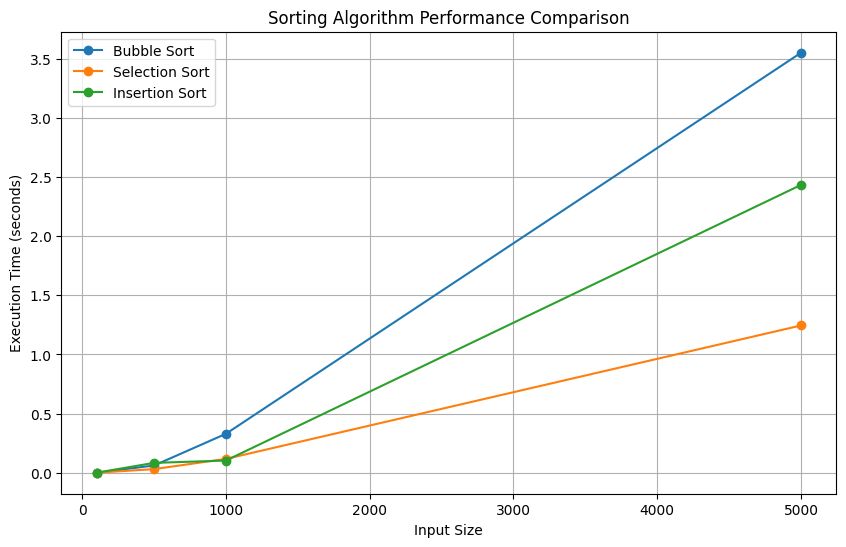

In [8]:
import time

import matplotlib.pyplot as plt

# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Insertion Sort
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

# Measure execution time and compare
def measure_execution_time():
    input_sizes = [100, 500, 1000, 5000]
    bubble_times = []
    selection_times = []
    insertion_times = []

    for size in input_sizes:
        arr = list(range(size, 0, -1))  # Reverse sorted list

        # Bubble Sort
        start_time = time.time()
        bubble_sort(arr.copy())
        bubble_times.append(time.time() - start_time)

        # Selection Sort
        start_time = time.time()
        selection_sort(arr.copy())
        selection_times.append(time.time() - start_time)

        # Insertion Sort
        start_time = time.time()
        insertion_sort(arr.copy())
        insertion_times.append(time.time() - start_time)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, bubble_times, label='Bubble Sort', marker='o')
    plt.plot(input_sizes, selection_times, label='Selection Sort', marker='o')
    plt.plot(input_sizes, insertion_times, label='Insertion Sort', marker='o')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
arr = [64, 25, 12, 22, 11]
print("Bubble Sort:", bubble_sort(arr.copy()))
print("Selection Sort:", selection_sort(arr.copy()))
print("Insertion Sort:", insertion_sort(arr.copy()))

# Measure and plot execution time
measure_execution_time()

In [9]:
# Task 2: Implementing Quick Sort and Merge Sort with Performance

Quick Sort: [11, 12, 22, 25, 64]
Merge Sort: [11, 12, 22, 25, 64]


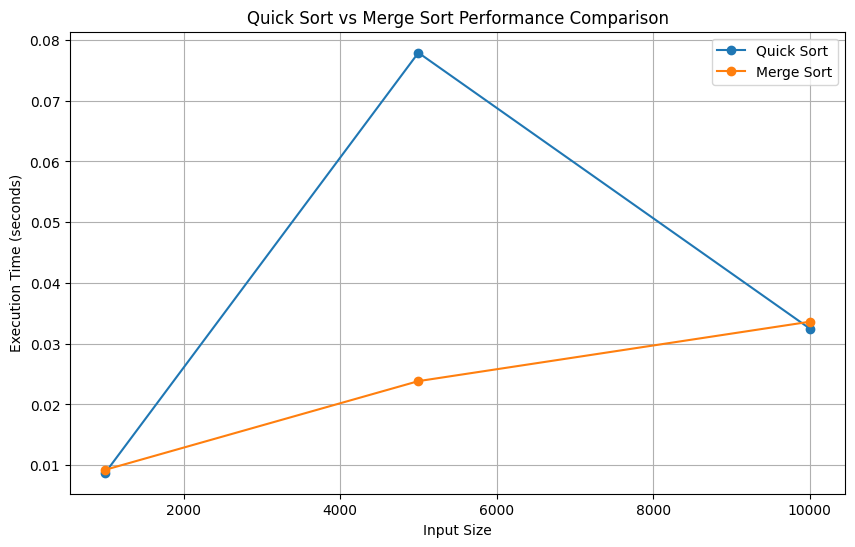

In [10]:
import random
import time

# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Performance comparison
def compare_sorting_algorithms():
    input_sizes = [1000, 5000, 10000]
    quick_sort_times = []
    merge_sort_times = []

    for size in input_sizes:
        arr = [random.randint(0, 100000) for _ in range(size)]

        # Quick Sort
        start_time = time.time()
        quick_sort(arr.copy())
        quick_sort_times.append(time.time() - start_time)

        # Merge Sort
        start_time = time.time()
        merge_sort(arr.copy())
        merge_sort_times.append(time.time() - start_time)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, quick_sort_times, label='Quick Sort', marker='o')
    plt.plot(input_sizes, merge_sort_times, label='Merge Sort', marker='o')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Quick Sort vs Merge Sort Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
print("Quick Sort:", quick_sort(arr.copy()))
print("Merge Sort:", merge_sort(arr.copy()))

# Compare performance
compare_sorting_algorithms()

In [11]:
# Task 3: Implementing Heap Sort and Counting Sort for Large Datasets 

Heap Sort: [1, 3, 4, 5, 10]
Counting Sort: [1, 1, 2, 2, 4, 5, 7]


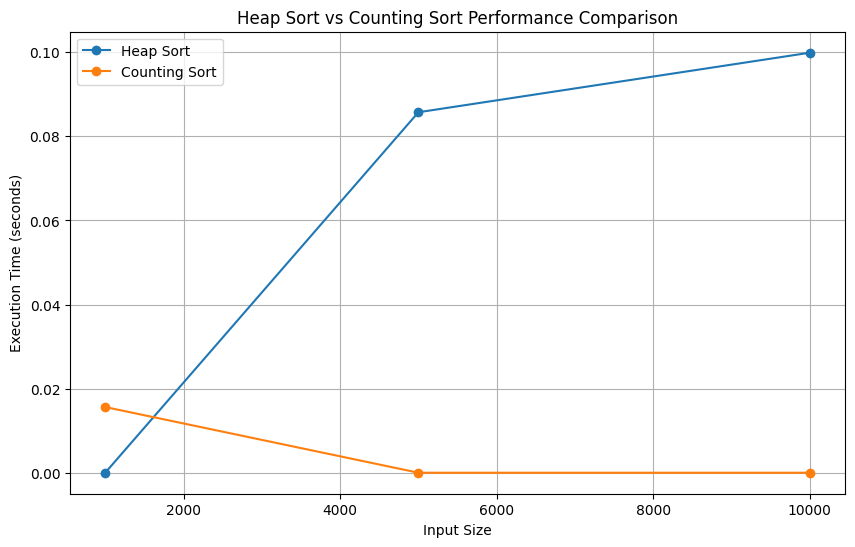

In [12]:
# Heap Sort
def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    left = 2 * i + 1  # Left child
    right = 2 * i + 2  # Right child

    # Check if left child exists and is greater than root
    if left < n and arr[left] > arr[largest]:
        largest = left

    # Check if right child exists and is greater than largest so far
    if right < n and arr[right] > arr[largest]:
        largest = right

    # If largest is not root
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        heapify(arr, n, largest)  # Recursively heapify the affected subtree

def heap_sort(arr):
    n = len(arr)

    # Build a maxheap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap
        heapify(arr, i, 0)

    return arr

# Counting Sort
def counting_sort(arr):
    max_val = max(arr)
    min_val = min(arr)
    range_of_elements = max_val - min_val + 1

    # Initialize count array
    count = [0] * range_of_elements
    output = [0] * len(arr)

    # Store the count of each element
    for num in arr:
        count[num - min_val] += 1

    # Update count array to store cumulative count
    for i in range(1, len(count)):
        count[i] += count[i - 1]

    # Build the output array
    for num in reversed(arr):
        output[count[num - min_val] - 1] = num
        count[num - min_val] -= 1

    return output

# Example usage
arr1 = [4, 10, 3, 5, 1]
print("Heap Sort:", heap_sort(arr1.copy()))

arr2 = [1, 4, 1, 2, 7, 5, 2]
print("Counting Sort:", counting_sort(arr2.copy()))

# Performance comparison
def compare_heap_and_counting_sort():
    input_sizes = [1000, 5000, 10000]
    heap_sort_times = []
    counting_sort_times = []

    for size in input_sizes:
        arr = [random.randint(0, 1000) for _ in range(size)]  # Limited range for counting sort

        # Heap Sort
        start_time = time.time()
        heap_sort(arr.copy())
        heap_sort_times.append(time.time() - start_time)

        # Counting Sort
        start_time = time.time()
        counting_sort(arr.copy())
        counting_sort_times.append(time.time() - start_time)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, heap_sort_times, label='Heap Sort', marker='o')
    plt.plot(input_sizes, counting_sort_times, label='Counting Sort', marker='o')
    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Heap Sort vs Counting Sort Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare performance
compare_heap_and_counting_sort()